In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - acc: 0.6222 - loss: 0.6361 - val_acc: 0.7980 - val_loss: 0.4566
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - acc: 0.8277 - loss: 0.3986 - val_acc: 0.8430 - val_loss: 0.3733
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - acc: 0.8691 - loss: 0.3215 - val_acc: 0.8200 - val_loss: 0.4016
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - acc: 0.8885 - loss: 0.2857 - val_acc: 0.8340 - val_loss: 0.4368
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - acc: 0.9079 - loss: 0.2341 - val_acc: 0.8436 - val_loss: 0.3537
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - acc: 0.9245 - loss: 0.1942 - val_acc: 0.7720 - val_loss: 0.6792
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - acc: 0.9475 - loss: 0.1491 - val_acc: 0.8418 - val_loss: 0.4870
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - acc: 0.9538 - loss: 0.1275 - val_acc: 0.8342 - val_loss: 0.5205
Epoch 9/10
157/157 ━━━━━━━━━━━━━

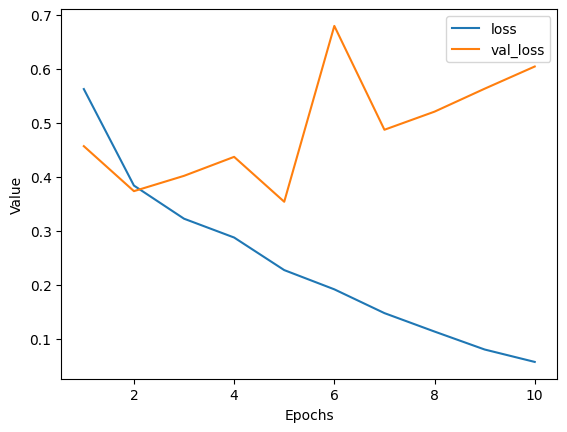

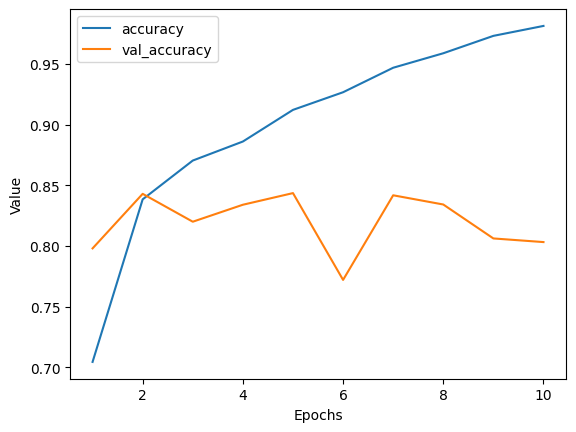

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['acc']) + 1), history.history['acc'], label='accuracy')
plt.plot(range(1, len(history.history['val_acc']) + 1), history.history['val_acc'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 274ms/step - acc: 0.5688 - loss: 0.6704 - val_acc: 0.7112 - val_loss: 0.5657
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 291ms/step - acc: 0.8106 - loss: 0.4294 - val_acc: 0.8596 - val_loss: 0.3482
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - acc: 0.8613 - loss: 0.3391 - val_acc: 0.7928 - val_loss: 0.4917
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - acc: 0.8833 - loss: 0.2986 - val_acc: 0.8720 - val_loss: 0.3012
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 291ms/step - acc: 0.8923 - loss: 0.2732 - val_acc: 0.8778 - val_loss: 0.2920
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 267ms/step - acc: 0.9110 - loss: 0.2371 - val_acc: 0.8830 - val_loss: 0.2839
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - acc: 0.9048 - loss: 0.2443 - val_acc: 0.8424 - val_loss: 0.3952
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 276ms/step - acc: 0.9123 - loss: 0.2252 - val_acc: 0.8498 - val_loss: 0.3517
Epoch 9/10
157/157 ━━━━━━━━━━━━━

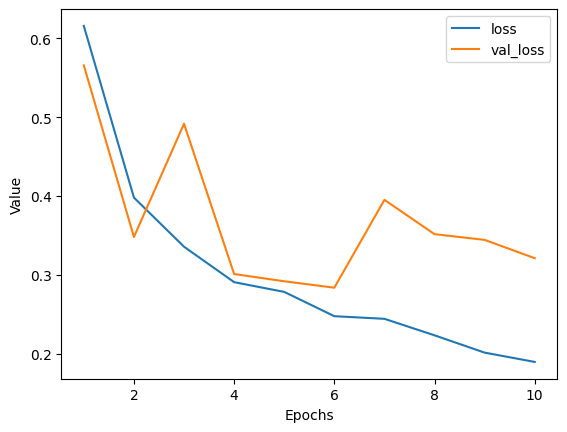

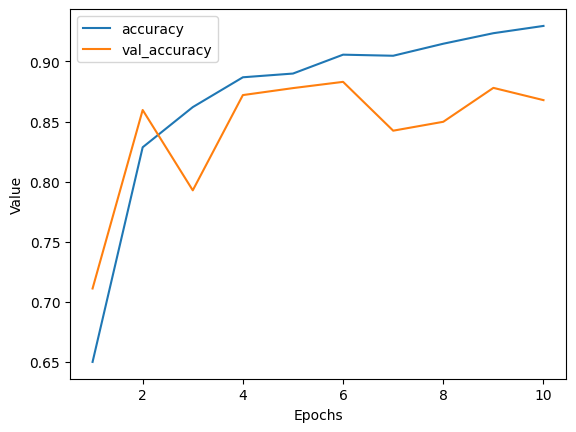

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['acc']) + 1), history.history['acc'], label='accuracy')
plt.plot(range(1, len(history.history['val_acc']) + 1), history.history['val_acc'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()